# Neural-Network-based Regression
Code by [karbon](https://github.com/csy-tvgo)

Reference:  
1.[TensorFlow Tutorial: Basic regression](https://tensorflow.google.cn/tutorials/keras/regression?hl=zh-cn)  
2.[Keras Documentation](https://keras.io/)

## 0 Story

Imagine you're the CEO of ***BurgerKenDonald***, a chain restaurant group. The statistical department of your group has collected some data, including **operation cost** (affected by rent, employment cost, etc.) and **profit** in last year (affected by traffic, population flow, etc.) of different stores.  

Now you're considering about opening a new store. You can estimate the operation cost due to location, average employment cost and some other factors.  
However, here comes a question, **how to rough estimate the profit of the new store?**

## 1 Observe the data from statistical department
Load dataset from csv file. 

In [2]:
import csv
import numpy as np

# Declare lists for storing dataset
operationCost = np.array([])
profit = np.array([])

# Load dataset from csv file
reader = csv.reader(open('C:\\Users\\admin\\代码\\机器学习\\dataForCEO-cost&profit.csv','r'))
for row in reader:
    operationCost = np.append(operationCost, float(row[0]))
    profit = np.append(profit, float(row[1]))

Plot trainset.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def plotData(x, y, color=None):
    plt.scatter(x.tolist(), y.tolist(), marker='x', color=color)
    plt.xlabel('Operation Cost in $')
    plt.ylabel('Profit in $')

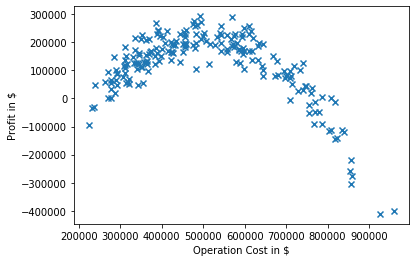

In [4]:
plt.figure(figsize=(6,4))
plotData(operationCost, profit)
plt.show()

#### How to build a model for prediction?  
Two weeks ago, we used **linear regression** to estimate the relationship between population of city and profit. Now, you may find linear model is not suitable for this scenario.  

Fortunately, you just learnt neural network. Although some other simpler model are more suitable for this scenario, you want to try **neural network** on these data.  

So, you can build a neural network by using `tensorflow.keras`. Let's start with an example. 

## 2 Divide dataset and preprocess dataset  
### 2.1 Divide dataset
First, you should divide the dataset into **a trainset and a testset**. As an example, we can define $80\%$ of the raw dataset is trainset and the other $20\%$ is testset.

In [31]:
dataset_x = operationCost 
dataset_y = profit 

num = len(dataset_x)
splitLine = int(0.8*num)

# generate a random list to select data randomly
index = [i for i in range(0, num)]
print(index)
import random
random.shuffle(index)

# divide into trainset and testset
train_x = dataset_x[index[0:splitLine]]                # numpy 数组的切片
train_y = dataset_y[index[0:splitLine]] 
test_x = dataset_x[index[splitLine:num]]
test_y = dataset_y[index[splitLine:num]]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


Let's observe the trainset and testset in different color.

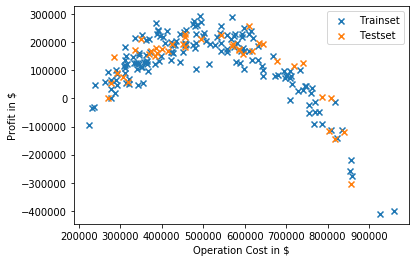

In [6]:
plt.figure(figsize=(6,4))
plotData(train_x, train_y)
plotData(test_x, test_y)
plt.legend(["Trainset","Testset"])
plt.show()

## 2.2 Preprocess dataset
Before training, we need to **preprocess** our trainset.  
Because the values in dataset are too big, computation of loss may be difficult. So, one method of preprocessing is **normalization**.  
In this case, we can do normalization by $$Normalized\ Value = \frac{RawValue}{Normalize Factor}$$

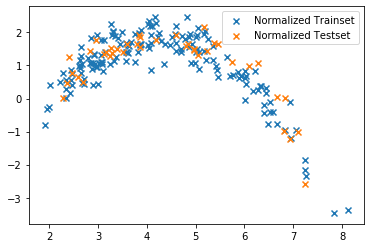

In [7]:
normFactor = np.mean(train_y) # for example

def normalize(val):
    return val / normFactor

normedTrain_x = normalize(train_x)
normedTrain_y = normalize(train_y)
normedTest_x = normalize(test_x)
normedTest_y = normalize(test_y)

plt.figure(figsize=(6,4))
plt.scatter(normedTrain_x, normedTrain_y, marker='x')
plt.scatter(normedTest_x, normedTest_y, marker='x')
plt.legend(["Normalized Trainset","Normalized Testset"])
plt.show()

# 3 Describe your neural network  
Then, let's create our nerual network.  
As an example, we describe a simple network as below. (The details of how to describe layers of network can find [here]
(https://tensorflow.google.cn/api_docs/python/tf/keras/layers/Dense?hl=zh-CN))

`Dense `实现以下操作： `output = activation(dot(input, kernel) + bias)` 其中` activation` 是按逐个元素计算的激活函数，`kernel` 是由网络层创建的权值矩阵，以及 `bias `是其创建的偏置向量 (只在 `use_bias` 为 `True` 时才有用)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# describe the model
model = keras.Sequential([                                     # 'relu' --> Rectified Linear Unit --> 多条直线相连接（见下图）
    layers.Dense(16, activation='relu', input_shape=(1,)),     # 输入层：16: 16个输出   1: 1个输入           
    layers.Dense(16, activation='relu'),                 # 隐含层
    layers.Dense(1)                               # 输出层： 最终输出1个值作为激活函数的输入
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


We can use `.summary` to print the brief description of the model.

`Sequential()`顺序模型是多个网络层的线性堆叠，你可以通过将网络层实例的列表传递给 `Sequential` 的构造器，来创建一个 `Sequential` 模型：

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


We can use **Mean Square Error (MSE)** as `loss` function, and use **Stochastic Gradient Descent (SGD)** as the process we train the model (i.e. "`optimizer`").

In [10]:
model.compile(loss='mse', optimizer='sgd')

# 4 Training  
We declare a variable to record the number of iteration.

In [11]:
iters = 0

`.train_on_batch` can train the model by one iteration, while `.fit` can train the model automatically until the model satisfies some settings.  
For better comprehention of the process of training, we use `.train_on_batch`.  
You can run the below cell <font color=orange>REPEATLY</font> to observe the process.

Train on 160 samples
Epoch 1/10
160/160 [==============================] - 0s 131us/sample - loss: 0.1320
Epoch 2/10
160/160 [==============================] - 0s 56us/sample - loss: 0.1821
Epoch 3/10
160/160 [==============================] - 0s 62us/sample - loss: 0.2370
Epoch 4/10
160/160 [==============================] - 0s 69us/sample - loss: 0.1896
Epoch 5/10
160/160 [==============================] - 0s 62us/sample - loss: 0.1875
Epoch 6/10
160/160 [==============================] - 0s 62us/sample - loss: 0.1357
Epoch 7/10
160/160 [==============================] - 0s 44us/sample - loss: 0.1739
Epoch 8/10
160/160 [==============================] - 0s 50us/sample - loss: 0.1371
Epoch 9/10
160/160 [==============================] - 0s 50us/sample - loss: 0.1492
Epoch 10/10
160/160 [==============================] - 0s 56us/sample - loss: 0.1558


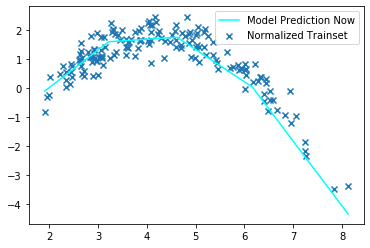

In [33]:
# actual training
'''for i in range(4000):
    iters = iters + 1
    cost = model.train_on_batch(normedTrain_x, normedTrain_y)     # .train_on_batch(): 运行一批样品的单次梯度更新
    if iters % 100 == 0:
        print("After %d iteration(s), train cost = %f "%(iters, cost))'''
model.fit(normedTrain_x,normedTrain_y,epochs=10)
# plot result
plt.figure(figsize=(6,4))
plt.scatter(normedTrain_x, normedTrain_y, marker='x')
temp = np.arange(min(normedTrain_x), max(normedTrain_x), 0.01)
plt.plot(temp, model.predict(temp),color = 'cyan')
plt.legend(["Model Prediction Now", "Normalized Trainset"])
plt.show()

# 5 Evaluation of the trained model  
We can use `.evaluate` to **compute loss on testset**.

In [30]:
cost = model.evaluate(normalize(test_x), normalize(test_y))
print('test cost:', cost)

40/40 [==============================] - 0s 83us/sample - loss: 0.1438
test cost: 0.14383293092250823


We can use `.get_weights` to observe the **weights** and **biases** of different layers.

In [14]:
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)
W, b = model.layers[1].get_weights()
print('Weights=', W, '\nbiases=', b)
W, b = model.layers[2].get_weights()
print('Weights=', W, '\nbiases=', b)

Weights= [[-0.47993523  0.20380357 -0.05917865 -0.40252334 -0.05727232  0.42827588
  -0.10679391  0.12377407  0.41265064 -0.21092552  0.15932408 -0.07732916
   0.0149131   0.3303646   0.2693039   0.0839172 ]] 
biases= [ 0.         -0.41812015  0.          0.          0.68724245 -0.2745775
  0.         -0.19264783 -0.93906176  0.         -0.21959476  0.
 -0.08517207  0.02416802  0.12451179  0.60092986]
Weights= [[ 0.24864182  0.12164423 -0.15683803 -0.12240106  0.12977472  0.40673205
   0.30226383  0.42204073 -0.30931425 -0.28428102  0.2977884   0.03963897
  -0.22128174 -0.31954104 -0.38405153  0.38894454]
 [ 0.3369985   0.13421096  0.07597537  0.1083842   0.5658729  -0.22467902
   0.04003598  0.1446456  -0.1745564  -0.31577995  0.01702399 -0.06911385
  -0.0541802   0.40590307  0.25442538  0.4206333 ]
 [ 0.08768812 -0.00507301 -0.4092905   0.21553299 -0.10716772 -0.41659442
   0.13785532  0.3680583   0.23480824 -0.35085216 -0.32364094 -0.4277405
   0.42338625 -0.02671239 -0.41112545 -0.

# 6 Postprocessing and final prediction  
Before predicting, we need to **postprocess** the output of the trained model.  
In above, we use normalization to preprocess. So, we use **denormalization** to postprocess the output of the trained model and get the final predict results.  

First, we define a function to denormalize.$$Prediction = (Normalized\ Value) \times (Normalize\ Factor)$$

In [34]:
def denormalize(val):
    return val * normFactor

Then, we compute our results of prediction,

In [35]:
temp = np.arange(min(normedTrain_x), max(normedTrain_x), 0.01)
pred_y = denormalize(model.predict(temp))
pred_xAxis = denormalize(temp)

and visualize our model of prediction.

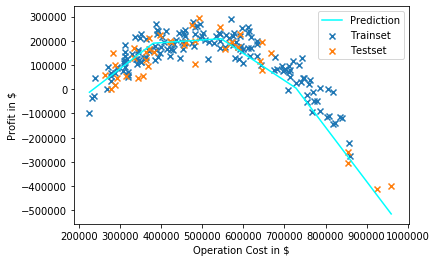

In [36]:
plt.figure(figsize=(6,4))
plotData(train_x, train_y)
plotData(test_x, test_y)
plt.plot(pred_xAxis, pred_y, color='cyan')
plt.legend(["Prediction","Trainset","Testset"])
plt.show()

Finally, you can rough estimate the profit of the new store.